# Python Library - Seaborn


One of the key differences between matlibplot and seaborn is that you can directly use Pandas dataframe in Seaborn.    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt #seaborn needs it
import seaborn as sns

## 1. Linear regression

In [5]:
tips = pd.read_csv("../python_basics/data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips_sns = sns.load_dataset("tips")

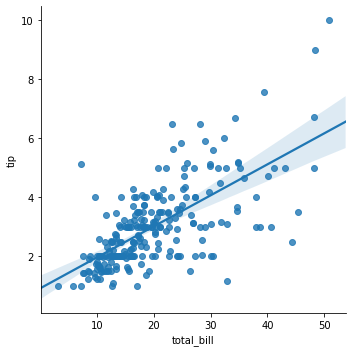

In [4]:
sns.lmplot(x="total_bill",y="tip",data=tips_sns) #these args are a must
plt.show()

## 1.1 Linear regression: grouping factors

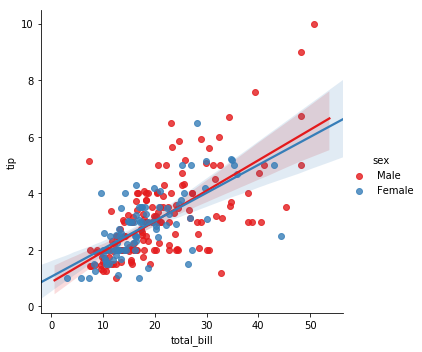

In [5]:
# linear regression using categorical type of data, palette is for color
sns.lmplot(x="total_bill",y="tip",data=tips_sns, hue="sex", palette = "Set1")
plt.show()

## 1.2 Linear regression: subplot

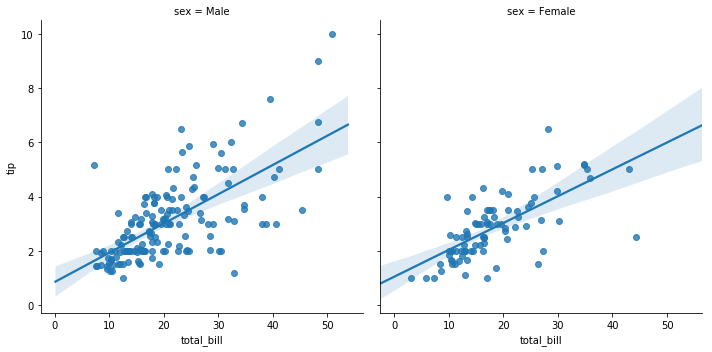

In [6]:
sns.lmplot(x="total_bill",y="tip",data=tips_sns, col="sex")
plt.show()

## 1.3 Linear regression: residues plots

How much data misses the regression line.    
resiplot(x= , y=) x,y can be numpy array or string.    


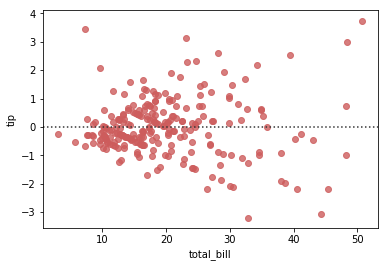

In [7]:
sns.residplot(x="total_bill",y="tip",data=tips_sns,color="indianred")
plt.show() #0 line is zero residue

### Examples: Automobile

In [6]:
auto = pd.read_csv("../python_basics/data/auto-mpg_full.csv")

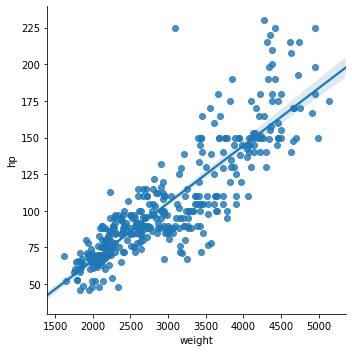

In [7]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show()

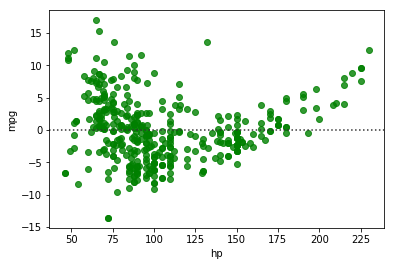

In [9]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()

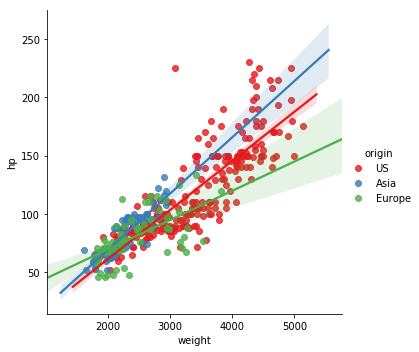

In [11]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x="weight",y="hp",data = auto, hue="origin", palette = "Set1")

# Display the plot
plt.show()

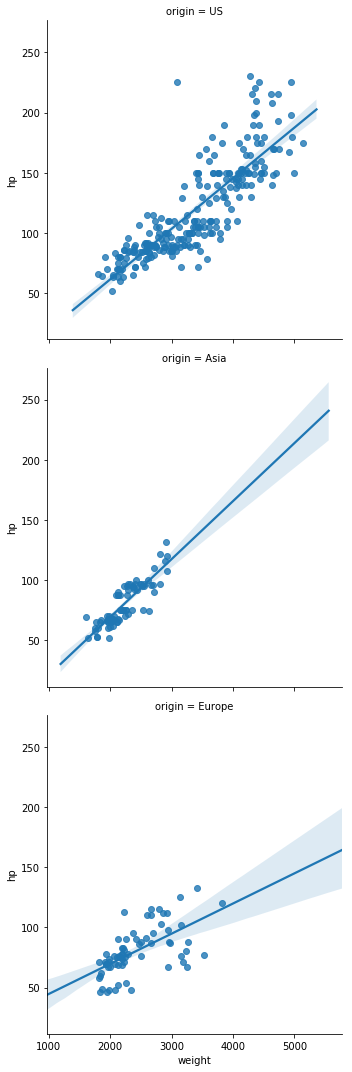

In [12]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x="weight",y="hp",data = auto, row="origin")

# Display the plot
plt.show()

## 1.4 Higher-order Regressions

When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.     

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using sns.regplot() (the function sns.lmplot() is a higher-level interface to sns.regplot()). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?     

A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed (sns.regplot() is more permissive).     

For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.
The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.

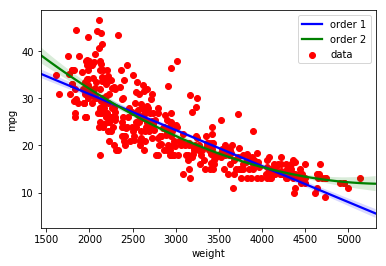

In [10]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto["mpg"], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color="blue", label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color="green", label='order 2',order = 2)

# Add a legend and display the plot
plt.legend(loc="upper right")
plt.show()


## 2. Univariate Data Visulisation (one variable)



## 2.1 Strip plots

A strip plot draw values on a number line to visulise samples of a single random variable.    
The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

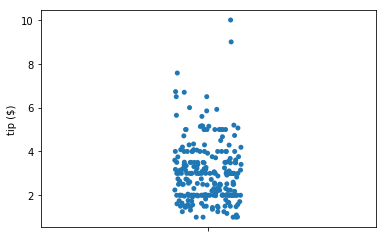

In [13]:
sns.stripplot(y="tip",data=tips)
plt.ylabel("tip ($)")
plt.show()

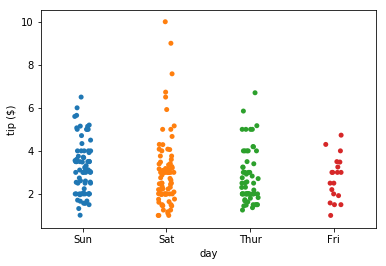

In [14]:
sns.stripplot(x = "day", y="tip",data=tips)
plt.ylabel("tip ($)")
plt.show()

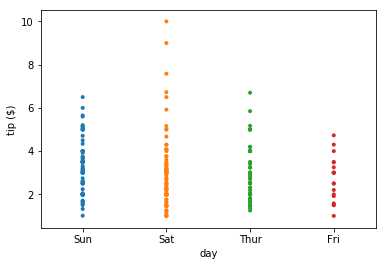

In [16]:
sns.stripplot(x = "day", y="tip",data=tips,size = 4, jitter=False) # no spread, same value stack on top of each other
plt.ylabel("tip ($)")
plt.show()

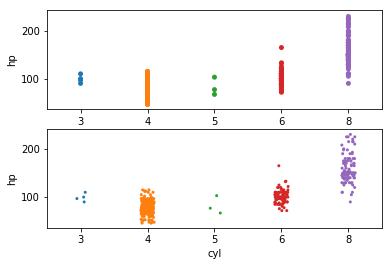

In [26]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x="cyl", y="hp", data=auto,jitter=False)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x="cyl", y="hp", data=auto, size=3, jitter=True)

# Display the plot
plt.show()


## 2.2 Swarm plot

Swamp plot automatically spread repeated value and give a sense of distribution.    
The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot(x='type', y='length', data=df).   

The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using orient='h' (horizontal) or orient='v' (vertical).     

Another grouping can be added in using the hue keyword. For instance, using sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.


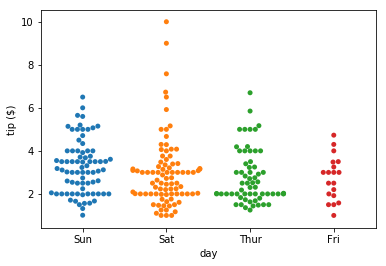

In [19]:
sns.swarmplot(x="day",y="tip",data=tips)
plt.ylabel("tip ($)")
plt.show()

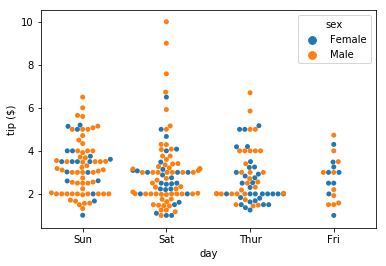

In [20]:
#more grouping
sns.swarmplot(x="day",y="tip",data=tips, hue="sex")
plt.ylabel("tip ($)")
plt.show()

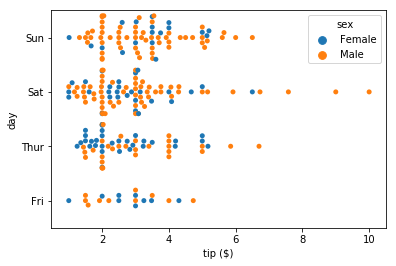

In [22]:
#more grouping
sns.swarmplot(x="tip",y="day",data=tips, hue="sex", orient="h")
plt.xlabel("tip ($)")
plt.show()

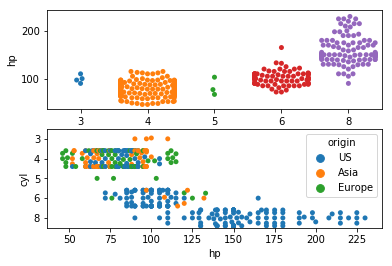

In [27]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x="cyl",y="hp",data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x="hp",y="cyl",data=auto, hue="origin",orient="h")

# Display the plot
plt.show()


## 2.3 violin plots and box plot

They are more useful when a large number of data is presented.    


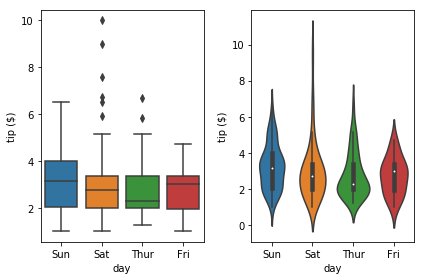

In [23]:
plt.subplot(1,2,1)
sns.boxplot(x='day',y="tip",data=tips)
plt.ylabel("tip ($)")
plt.subplot(1,2,2)
sns.violinplot(x="day",y="tip",data=tips)
plt.ylabel("tip ($)")
plt.tight_layout()
plt.show()

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


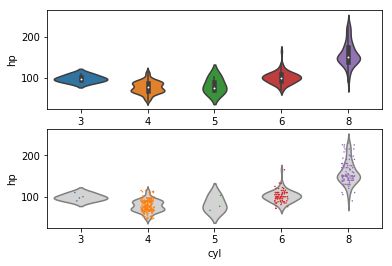

In [28]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x="cyl", y="hp", data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x="cyl",y="hp",data=auto,inner=None,color="lightgray")

# Overlay a strip plot on the violin plot
plt.subplot(2,1,2)
sns.stripplot(x="cyl",y="hp",data=auto,size=1.5,jitter=True)

# Display the plot
plt.show()

## 2.4 Combining different type of plot

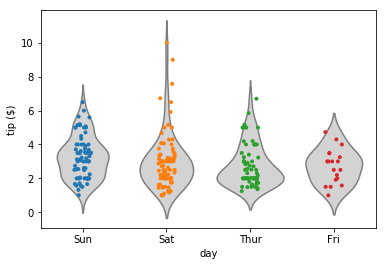

In [24]:
sns.violinplot(x="day",y="tip",data=tips, inner=None, color="lightgray")  #disable inner box plot
sns.stripplot(x="day",y="tip",data=tips,size=4,jitter=True)
plt.ylabel("tip ($)")
plt.show()

## 3. Bivariate and Multivariate Visulisation

Looking for relationship between two or more variables.    


## 3.1 Joint plots

shows a scatter plot between two variable, with each hitograms corresponding to the two variables shown.    
By default, calling sns.jointplot(x, y, data) renders a few things:   

A scatter plot using the specified columns x and y from the DataFrame data.    
A (univariate) histogram along the top of the scatter plot showing distribution of the column x.     
A (univariate) histogram along the right of the scatter plot showing distribution of the column y.     

Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame)

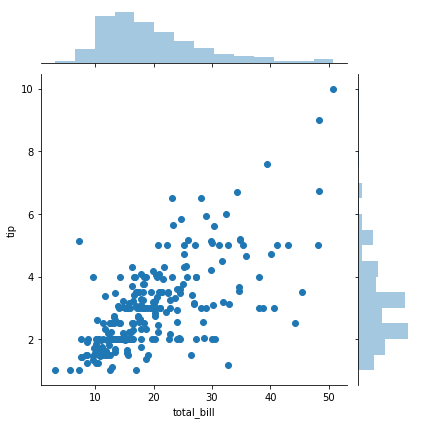

In [29]:
sns.jointplot(x="total_bill",y="tip",data=tips)
plt.show()

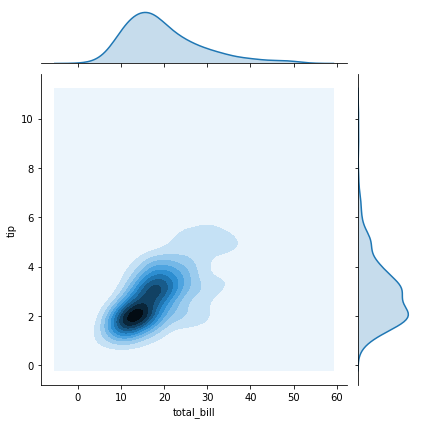

In [30]:
#joint plot using Kernal Density Plot (KDE)
sns.jointplot(x="total_bill",y="tip",data=tips,kind="kde")
plt.show()

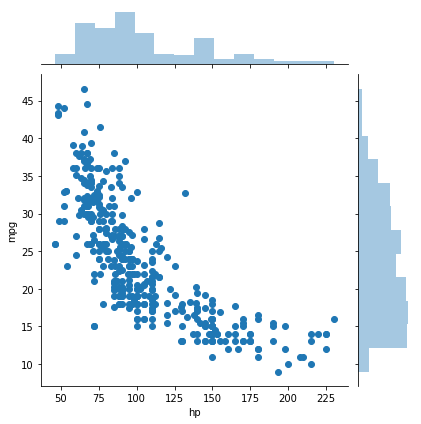

In [36]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x="hp",y="mpg",data=auto)

# Display the plot
plt.show()

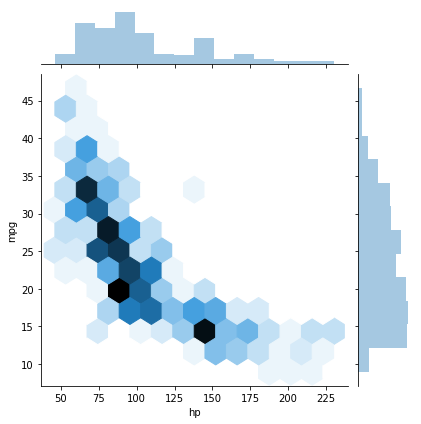

In [37]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x="hp",y="mpg",data=auto,kind="hex")

# Display the plot
plt.show()


## 3.2 Pair plots

With more than two variable, we may want to plot all possible joint plot for each pair of variable.   

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

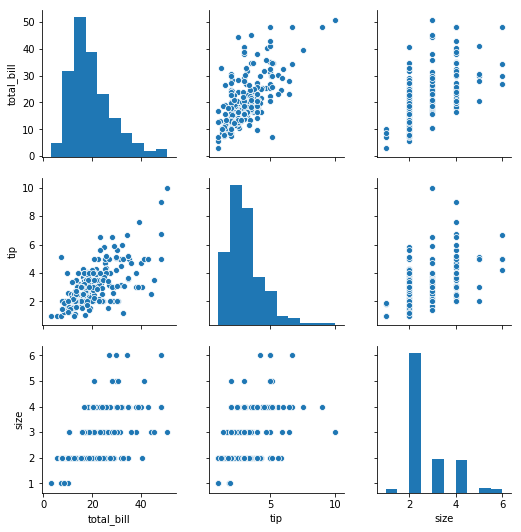

In [31]:
sns.pairplot(tips) #only three variable is used as others contained string
plt.show() #diagonals are histogram of the single variable.
#label of dataframe is used.

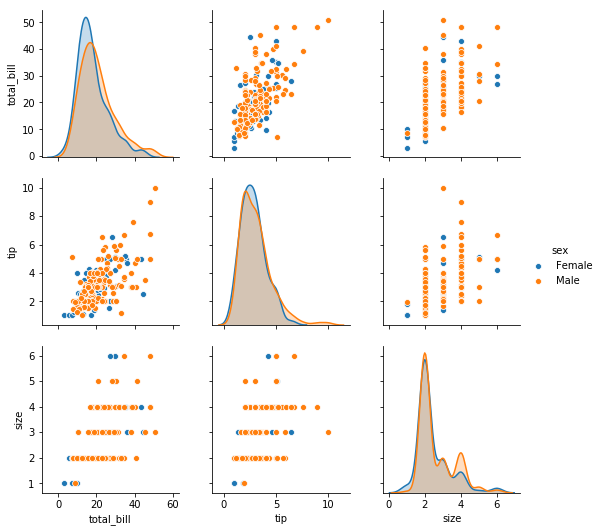

In [32]:
sns.pairplot(tips,hue="sex") #only three variable is used as others contained string
plt.show() 

In [9]:
auto_small = pd.read_csv("../python_basics/data/auto-mpg_full.csv",usecols=[0,3,7])
auto_small.head()


,mpg,hp,origin
0,18.0,88,US
1,9.0,193,US
2,36.1,60,Asia
3,18.5,98,US
4,34.3,78,Europe


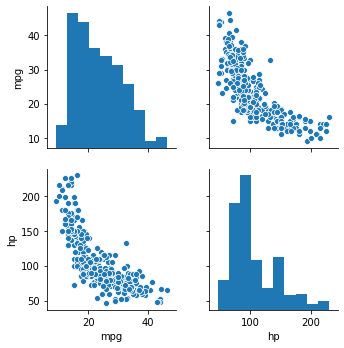

In [10]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(data=auto_small) #default kind is scatter

# Display the plot
plt.show()

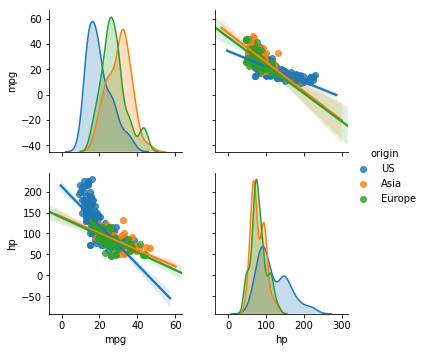

In [40]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(data=auto_small,kind="reg",hue="origin")

# Display the plot
plt.show()

## 3.3 heat maps

Similar to pcolor plot of a matrix with added functionality for DataFrame

In [34]:
dict = {
    "total_bill":[1.000000,0.675734,0.598315],
    "tip":[0.675734,1.000000,0.489299],
    "size":[0.598315,0.489299,1.000000]
}
#keys (col labels)   values (data, col by col)
covariance = pd.DataFrame(dict) #coverance show how two variable are related to each other
covariance.index = ["total_bill","tip","size"]
print(covariance)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


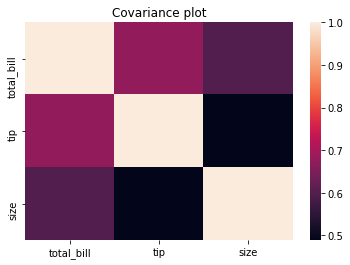

In [35]:
sns.heatmap(covariance)
plt.title("Covariance plot")
plt.show()